In [1]:
# !pip install mercury --break-system-packages
!pip install torch_pruning --break-system-packages

Defaulting to user installation because normal site-packages is not writeable


In [10]:
!pip show ultralytics
import sys
from fedCore_class.fedcore_wrapper import FedcoreWrapper
print("------")
print(sys.version)
from IPython.display import display, Image
import threading
import ultralytics
fedcore_class = FedcoreWrapper(".")
fedcore_class.init_data("Small")


Name: ultralytics
Version: 8.2.31
Summary: Ultralytics YOLOv8 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: 
Author: Glenn Jocher, Ayush Chaurasia, Jing Qiu
Author-email: 
License: AGPL-3.0
Location: /home/karl/.local/lib/python3.12/site-packages
Requires: matplotlib, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, torch, torchvision, tqdm, ultralytics-thop
Required-by: 
------
3.12.4 (main, Jun  7 2024, 06:33:07) [GCC 14.1.1 20240522]
Device:     NVIDIA GeForce RTX 3060
Data Path:  /run/media/karl/New_SSD/FedCore/datasets/temp


In [11]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import Image, display

import ipywidgets as pw
from IPython.display import display
import pandas as pd
from ipywidgets import interact
import time
import mercury as mr
from ultralytics import YOLO



In [12]:
def save_labels_train(b):
    with out:
        print('Uploaded')
        if train_labels_loader.value:
            # Get the uploaded file
            for file_data in train_labels_loader.value:            
                destination_folder = f'./datasets/{my_selection.value}/train/labels/'
        
                # Create the destination folder if it doesn't exist
                if not os.path.exists(destination_folder):
                    os.makedirs(destination_folder)
                
                with open(os.path.join(destination_folder, file_data['name']), 'wb') as f:
                    f.write(file_data['content'])
        


def save_labels_test(b):
    with out:
        print('Uploaded')
        if test_labels_loader.value:
            # Get the uploaded file
            for file_data in test_labels_loader.value:            
                destination_folder = f'./datasets/{my_selection.value}/test/labels/'
        
                # Create the destination folder if it doesn't exist
                if not os.path.exists(destination_folder):
                    os.makedirs(destination_folder)
                
                with open(os.path.join(destination_folder, file_data['name']), 'wb') as f:
                    f.write(file_data['content'])
        
                # Disable the file uploaded and update the button text
            save_button.description = "Labels Saved!"

def save_images_train(b):
    with out:
        print('Uploaded')
        if train_images_loader.value:
            # Get the uploaded file\
            destination_folder = f'./datasets/{my_selection.value}/train/images/'
            if not os.path.exists(destination_folder):
                    os.makedirs(destination_folder)
            for file_data in train_images_loader.value:            
                # Create the destination folder if it doesn't exist
                with open(os.path.join(destination_folder, file_data['name']), 'wb') as f:
                    f.write(file_data['content'])
        


def save_images_test(b):
    with out:
        print('Uploaded')
        if test_images_loader.value:
            # Get the uploaded file
            for file_data in test_images_loader.value:            
                destination_folder =f'./datasets/{my_selection.value}/test/images/'
        
                # Create the destination folder if it doesn't exist
                if not os.path.exists(destination_folder):
                    os.makedirs(destination_folder)
                
                with open(os.path.join(destination_folder, file_data['name']), 'wb') as f:
                    f.write(file_data['content'])
        


In [13]:
from ipywidgets import FileUpload, Layout
from IPython.display import display
import os
out = widgets.Output()


def train_model(b):
    with out:
        fedcore_class.init_data(my_selection.value)
        fedcore_class.init_model()
        fedcore_class.train(epoch=int(epoch.value))
    


train_labels_loader = widgets.FileUpload(
    description='Load train labels',
    layout=Layout(width='200px'),
    accept='.txt',
    multiple=True
)
train_labels_btn = widgets.Button(
    description="Save train labels",
    layout=Layout(width='200px'),
    disabled=False,
    button_style='success'
)

test_labels_loader = widgets.FileUpload(
    description='Load test labels',
    layout=Layout(width='200px'),
    accept='.txt',
    multiple=True
)
test_labels_btn = widgets.Button(
    description="Save test labels",
    layout=Layout(width='200px'),
    disabled=False,
    button_style='success'
)
train_labels_btn.on_click(save_labels_train)
test_labels_btn.on_click(save_labels_test)


train_images_loader = widgets.FileUpload(
    description='Load train images',
    layout=Layout(width='200px'),
    accept='.*',
    multiple=True
)
train_images_btn = widgets.Button(
    description="Save train images",
    layout=Layout(width='200px'),
    disabled=False,
    button_style='success'
)

test_images_loader = widgets.FileUpload(
    description='Load test images',
    layout=Layout(width='200px'),
    accept='.*',
    multiple=True
)
test_images_btn = widgets.Button(
    description="Save test images",
    layout=Layout(width='200px'),
    disabled=False,
    button_style='success'
)
train_images_btn.on_click(save_images_train)
test_images_btn.on_click(save_images_test)


train = widgets.Button(
    description="Train",
    layout=Layout(width='200px'),
    disabled=False,
    button_style='success'
)
train.on_click(train_model)


In [14]:
my_selection = mr.Select(value = "Small", choices = ["chips", "Small"], label = "Select dataset:")
epoch = mr.Select(value = "", choices = ["1", "2", "5", "10", "15", "20", "25"], label = "Epoch:")

display(widgets.HBox((train_labels_loader, test_labels_loader, train)))
display(widgets.HBox((train_labels_btn, test_labels_btn)))
display(widgets.HBox((train_images_loader, test_images_loader)))
display(widgets.HBox((train_images_btn, test_images_btn)))


display(out)

mercury.Select

mercury.Select

Output()

In [15]:
current_filename = ""
current_image_number = 0
video_image_number = 0
stop_val = False

In [16]:
fedcore_class.init_data("Small")
fedcore_class.init_model()
fedcore_class.load_model("FasterRCNN_chips.pt")
out = widgets.Output()


def next_image_func(b):
    with out:
        global current_image_number
        path = f"datasets/{dataset.value}/test/images"
        dir_list = os.listdir(path)
        if current_image_number + 1 < len(dir_list):
            current_image_number = current_image_number + 1
            display_image.update(predict_image(os.path.join(path, dir_list[current_image_number])))
            
        
def previous_image_func(b):
    with out:
        global current_image_number
        path = f"datasets/{dataset.value}/test/images"
        dir_list = os.listdir(path)
        if current_image_number - 1 > 0:
            current_image_number = current_image_number - 1
            display_image.update(predict_image(os.path.join(path, dir_list[current_image_number])))
            


def predict_image(filename):
    return(fedcore_class.predict_one_image(filename, NMS_THRESH.value, TRESH.value))

NMS_THRESH = widgets.FloatSlider(
    value=0.5,
    min=0,
    max=1.0,
    step=0.01,
    description='NMS_THRESH:'
)
TRESH = widgets.FloatSlider(
    value=0.1,
    min=0,
    max=1.0,
    step=0.01,
    description='TRESH:'
)
next_image = widgets.Button(
    description="Next",
    layout=Layout(width='200px'),
    disabled=False,
    button_style='success'
)
previous_image = widgets.Button(
    description="Previous",
    layout=Layout(width='200px'),
    disabled=False,
    button_style='success'
)
next_image.on_click(next_image_func)

previous_image.on_click(previous_image_func)

dataset = mr.Select(value = "Small", choices = ["chips", "Small"], label = "Select dataset:")
display(widgets.HBox((NMS_THRESH, TRESH)))
display(widgets.HBox((previous_image, next_image)))

display_image=display(None, display_id=True)


display(out)

Data Path:  /run/media/karl/New_SSD/FedCore/datasets/temp


mercury.Select

None

Output()

Data Path:  /run/media/karl/New_SSD/FedCore/datasets/temp


mercury.Select

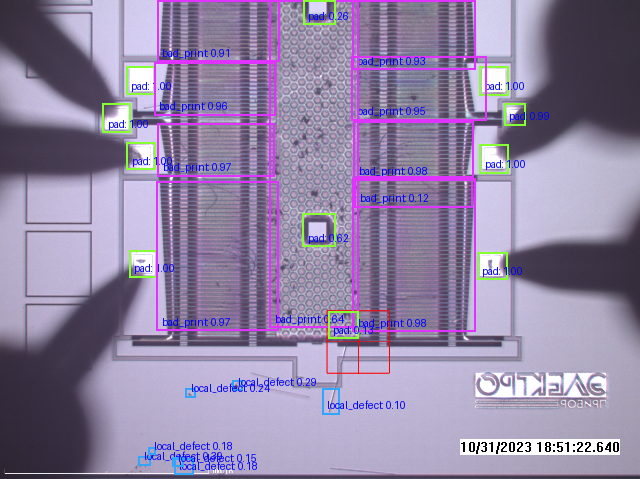

Output()

0
0
0


In [32]:
fedcore_class.init_data("Small")
fedcore_class.init_model()
fedcore_class.load_model("FasterRCNN_chips.pt")
out = widgets.Output()
from time import sleep
stop_event= threading.Event()

x = threading.Thread(target=start_func, args=(stop_event,))
x.setDaemon(True)                   

def start_func(stop_event):
    global video_image_number
    global stop_val
    global display_video
    print(video_image_number)
    stop_val = False
    with out:
        path = f"datasets/{dataset.value}/test/images"
        dir_list = os.listdir(path)
        for i in range(0, len(dir_list)):
            image = predict_image(os.path.join(path, dir_list[i]))
            display_video.update(image)
            sleep(0.5)
            if stop_event.is_set():
                break
                    
def start_thread(b):
    global x
    global stop_event
    stop_event= threading.Event()

    x = threading.Thread(target=start_func, args=(stop_event,))
    x.setDaemon(True)
    x.start()



def stop_func(b):
    with out:
        print("Stop")
        stop_event.set()
            

def predict_image(filename):
    return(fedcore_class.predict_one_image(filename, NMS_THRESH.value, TRESH.value))
    

NMS_THRESH = widgets.FloatSlider(
    value=0.5,
    min=0,
    max=1.0,
    step=0.01,
    description='NMS_THRESH:'
)
TRESH = widgets.FloatSlider(
    value=0.1,
    min=0,
    max=1.0,
    step=0.01,
    description='TRESH:'
)
start = widgets.Button(
    description="Start",
    layout=Layout(width='200px'),
    disabled=False,
    button_style='success'
)
stop = widgets.Button(
    description="Stop",
    layout=Layout(width='200px'),
    disabled=False,
    button_style='success'
)

start.on_click(start_thread)
stop.on_click(stop_func)

dataset = mr.Select(value = "Small", choices = ["chips", "Small"], label = "Select dataset:")
display(widgets.HBox((NMS_THRESH, TRESH)))
display(widgets.HBox((start, stop)))


display_video=display(None, display_id=True)


display(out)